In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#Algoritmos de previsão ML
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

#Divisão do dataset em treino e teste
from sklearn.model_selection import train_test_split, KFold

#Para normalizar o Fare
from sklearn.preprocessing import StandardScaler

#Avaliação do modelo
from sklearn.metrics import accuracy_score as acc

In [224]:
train = pd.read_csv('../titanic/train_eda.csv')
test = pd.read_csv('../titanic/test_eda.csv')

In [225]:
train.head()

,Survived,Pclass,Age,Fare,Have_Cabin,Sozinho,Crianca,Meia_Idade,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Rare
0,0,3,22.0,7.2500,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,1,38.0,71.2833,1,0,0,1,1,0,1,0,0,0,0,0,1,0
2,1,3,26.0,7.9250,0,1,0,1,1,0,0,0,1,0,1,0,0,0
3,1,1,35.0,53.1000,1,0,0,1,1,0,0,0,1,0,0,0,1,0
4,0,3,35.0,8.0500,0,1,0,1,0,1,0,0,1,0,0,1,0,0


Como temos valores Fare muito distantes um do outro, é melhor normalizar..

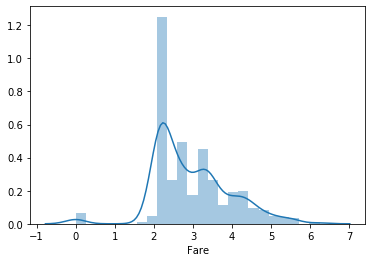

In [142]:
sns.distplot(np.log1p(train.Fare))

In [226]:
train['Fare_log'] = np.log1p(train.Fare)

In [227]:
test['Fare_log'] = np.log1p(test.Fare)

In [228]:
test.head()

,PassengerId,Pclass,Age,Fare,Have_Cabin,Sozinho,Crianca,Meia_Idade,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Rare,Fare_log
0,892,3,34.5,7.8292,0,1,0,1,0,1,0,1,0,0,0,1,0,0,2.178064
1,893,3,47.0,7.0000,0,0,0,0,1,0,0,0,1,0,0,0,1,0,2.079442
2,894,2,62.0,9.6875,0,1,0,0,0,1,0,1,0,0,0,1,0,0,2.369075
3,895,3,27.0,8.6625,0,1,0,1,0,1,0,0,1,0,0,1,0,0,2.268252
4,896,3,22.0,12.2875,0,0,0,1,1,0,0,0,1,0,0,0,1,0,2.586824


In [229]:
X = train.drop(['Survived','Fare'], axis=1)
y = train.Survived

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [231]:
X_test.shape, X_train.shape

((268, 17), (623, 17))

In [232]:
X_train.head()

,Pclass,Age,Have_Cabin,Sozinho,Crianca,Meia_Idade,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Rare,Fare_log
857,1,51.0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,3.316003
52,1,49.0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,4.353231
386,3,1.0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,3.869116
124,1,54.0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,4.360388
578,3,28.0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,2.738146


In [233]:
test.head()

,PassengerId,Pclass,Age,Fare,Have_Cabin,Sozinho,Crianca,Meia_Idade,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Rare,Fare_log
0,892,3,34.5,7.8292,0,1,0,1,0,1,0,1,0,0,0,1,0,0,2.178064
1,893,3,47.0,7.0000,0,0,0,0,1,0,0,0,1,0,0,0,1,0,2.079442
2,894,2,62.0,9.6875,0,1,0,0,0,1,0,1,0,0,0,1,0,0,2.369075
3,895,3,27.0,8.6625,0,1,0,1,0,1,0,0,1,0,0,1,0,0,2.268252
4,896,3,22.0,12.2875,0,0,0,1,1,0,0,0,1,0,0,0,1,0,2.586824


In [260]:
xgb = XGBClassifier(random_state=0, max_depth=3, subsample=0.8, n_estimators=300)
lgbm = LGBMClassifier(random_state=0, objective='binary', max_depth=5, n_estimators=100)
rf = RandomForestClassifier(max_depth=3, )

In [235]:
lgbm.fit(X_train, y_train)
ylgbm = lgbm.predict(X_test)

acc(y_test, ylgbm)

0.8582089552238806

In [261]:
clfs = [xgb, lgbm, rf]

for clf in clfs:
    
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)
    ytrain = clf.predict(X_train)
    
    print('-'*20)
    print('Teste',acc(y_test,y))
    print('Treino',acc(y_train,ytrain))

--------------------
Teste 0.8544776119402985
Treino 0.9309791332263242
--------------------
Teste 0.8582089552238806
Treino 0.9085072231139647
--------------------
Teste 0.8059701492537313
Treino 0.8298555377207063


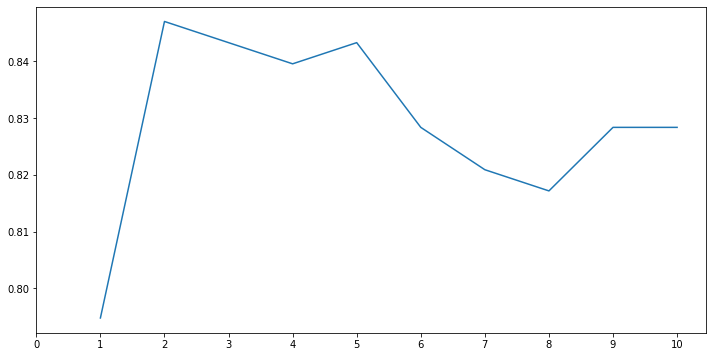

Accuracies for different values of n are: [0.79477612 0.84701493 0.84328358 0.83955224 0.84328358 0.82835821
 0.82089552 0.81716418 0.82835821 0.82835821] with the max value as  0.8470149253731343


In [241]:
a_index=list(range(1,11))
a=pd.Series()

x=[0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    
    model = XGBClassifier(max_depth=i) 
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    a = a.append(pd.Series(acc(y_test,prediction)))
    
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

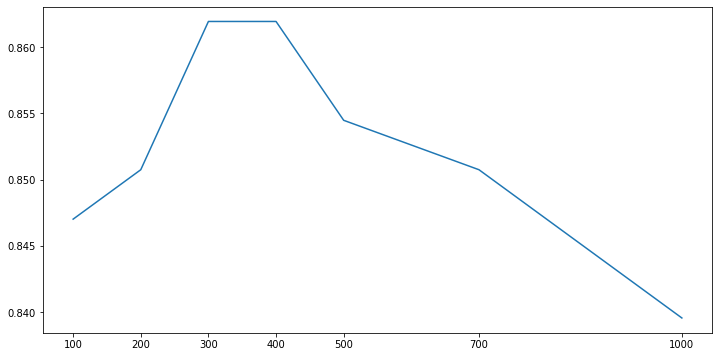

Accuracies for different values of n are: [0.84701493 0.85074627 0.8619403  0.8619403  0.85447761 0.85074627
 0.83955224] with the max value as  0.8619402985074627


In [242]:
a_index=list(range(1,8))
a=pd.Series()

x=[100,200,300,400,500,700,1000]

for i in x:
    model=XGBClassifier(max_depth=2, n_estimators=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(acc(y_test,prediction)))
plt.plot(x, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

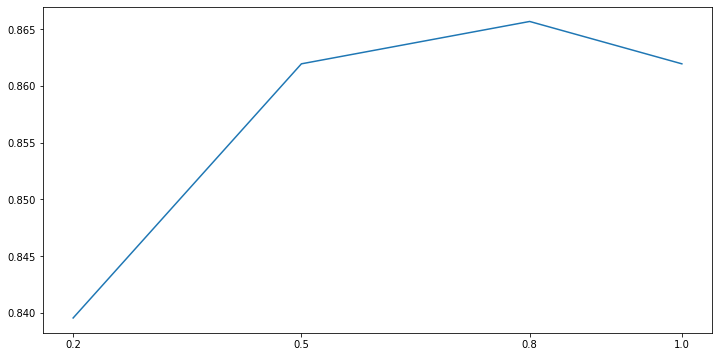

Accuracies for different values of n are: [0.83955224 0.8619403  0.86567164 0.8619403 ] with the max value as  0.8656716417910447


In [247]:
a_index=list(range(1,11))
a=pd.Series()

x=[0.2, 0.5, 0.8, 1]

for i in x:
    
    model = XGBClassifier(max_depth=2, random_state=0, subsample=i, n_estimators=300) 
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    a = a.append(pd.Series(acc(y_test,prediction)))
    
plt.plot(x, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [262]:
Ids = test.PassengerId
preds = xgb.predict(test.drop(['PassengerId','Fare'], axis=1))

sub = pd.DataFrame()
sub['PassengerId'] = Ids
sub['Survived'] = preds

sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Agora é só salvar o csv com as previsões e upar no kaggle

In [263]:
sub.to_csv('../titanic/subs.csv', index=False)